# GRADED CHALLENGE 2 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

**Dataset Description**
<br>
* dataset berisi data observasi cuaca sepanjang 10 tahun yang diambil dari berbagai lokasi di Australia.
<br>
* observasi diperoleh dari berbagai macam stasiun cuaca. untuk observasi harian dapat dilihat di website berikut : http://www.bom.gov.au/climate/data.
<br>
* Definisi atribut dapat dibaca dan diperoleh dari http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
<br>
* sumber data: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.
* dataset projek ini dikoleksi oleh joe young dan adam young yang dapat diakses di https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
<br>

**Project Objective**
<br>
* melakukan prediksi cuaca apakah akan terjadi hujan atau tidak
* meninjau nilai recall score dari model untuk kasus prediksi hujan
<br>
<br>

**Attribute Description:**

Date - The date of observation
<br>
Location - The common name of the location of the weather station
<br>
MinTemp - The minimum temperature in degrees celsius
<br>
MaxTemp - The maximum temperature in degrees celsius
<br>
Rainfall - The amount of rainfall recorded for the day in mm
<br>
Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
<br>
Sunshine - The number of hours of bright sunshine in the day.
<br>
WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
<br>
WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
<br>
WindDir9am - Direction of the wind at 9am
<br>
WindDir3pm - Direction of the wind at 3pm
<br>
WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
<br>
WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
<br>
Humidity9am - Humidity (percent) at 9am
<br>
Humidity3pm - Humidity (percent) at 3pm
<br>
Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
<br>
Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
<br>
Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
<br>
Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
<br>
Temp9am - Temperature (degrees C) at 9am
<br>
Temp3pm - Temperature (degrees C) at 3pm
<br>
RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
<br>
RainTomorrow - The amount of next day rain in mm. Used to create response 
variable RainTomorrow. A kind of measure of the "risk".

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_roc_curve, roc_curve, auc, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [3]:
data = pd.read_csv('weatherAUS.csv')

In [4]:
pd.set_option("display.max_columns", 100)

In [5]:
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
77673,2016-08-14,Portland,6.9,14.4,3.6,NaN,NaN,WNW,46.0,NNW,W,15.0,26.0,94.0,73.0,1026.4,1026.1,NaN,8.0,9.9,13.0,Yes,No
121507,2010-11-17,Perth,13.2,34.9,0.0,9.8,13.1,SW,37.0,NE,SW,15.0,20.0,28.0,18.0,1017.3,1014.6,0.0,0.0,26.5,31.7,No,No
70474,2009-03-23,Mildura,11.6,27.0,0.0,8.0,11.1,SSE,26.0,SSE,WSW,15.0,11.0,77.0,29.0,1017.2,1014.7,1.0,0.0,13.7,25.2,No,No
83541,2016-03-17,Dartmoor,13.2,35.4,0.0,6.8,5.6,WNW,67.0,NNE,NNW,15.0,26.0,50.0,24.0,1008.6,1002.5,NaN,NaN,23.8,34.3,No,Yes
119959,2015-08-17,PerthAirport,15.4,20.7,7.6,0.8,1.7,N,43.0,ENE,N,15.0,17.0,87.0,81.0,1019.1,1015.6,7.0,7.0,17.3,18.3,Yes,Yes


In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
data.duplicated().sum()

0

In [9]:
#copy data
data_copy = data.copy()

In [10]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [12]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


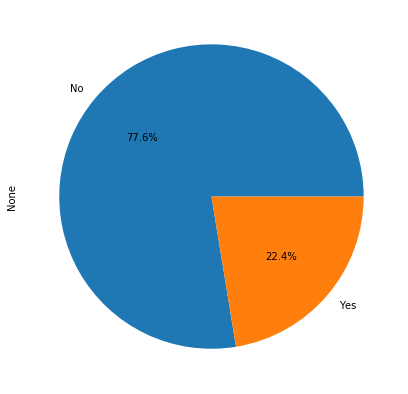

In [13]:
data.groupby('RainToday').size().plot(kind='pie', autopct='%1.1f%%', figsize=(10,7))

dari data 10 tahun terakhir total jumlah hari yang hujan adalah 22.4 persen dan sisanya adalah hari yang tidak hujan. dataset imbalance karena lebih banyak hari yang tidak hujan dibanding hari hujan

In [14]:
rain_tmrw = data.groupby(['RainToday', 'RainTomorrow'])['RainTomorrow'].count().unstack()
rain_tmrw = pd.DataFrame(rain_tmrw).reset_index()

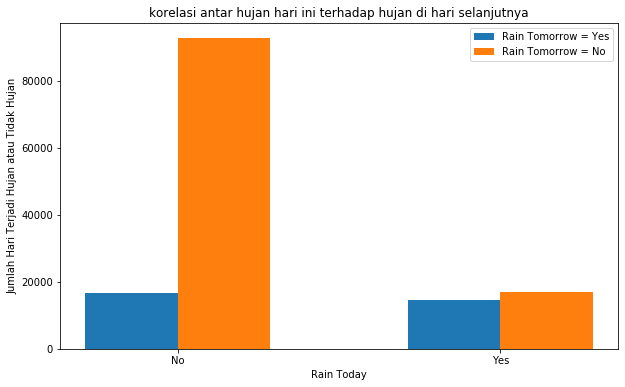

In [15]:
plt.figure(figsize=(10,6))
plt.bar([0.5,1.2], rain_tmrw.Yes, 0.2, label='Rain Tomorrow = Yes')
plt.bar([0.7,1.4], rain_tmrw.No, 0.2, label='Rain Tomorrow = No')
plt.xlabel('Rain Today')
plt.ylabel('Jumlah Hari Terjadi Hujan atau Tidak Hujan')
plt.title('korelasi antar hujan hari ini terhadap hujan di hari selanjutnya')
plt.xticks([0.6,1.3], rain_tmrw.RainToday)
plt.legend(loc='best')
plt.show()

visual di atas menjelaskan : 
* pertama saat kondisi rain today adalah tidak hujan, ternyata menariknya keesokan harinya memiliki probabilitas yang sangat tinggi akan terjadi hujan
* kedua saat kondisi rain today adalah hujan, keesokan harinya memiliki kecenderungan yang tidak terpaut terlalu jauh antar hujan atau tidak hujan, artinya probabilitas antar hujan dan tidak hujan cenderung sama.

In [16]:
temp_related = ['MinTemp', 'MaxTemp']

Text(0, 0.5, 'Rainfall Mean')

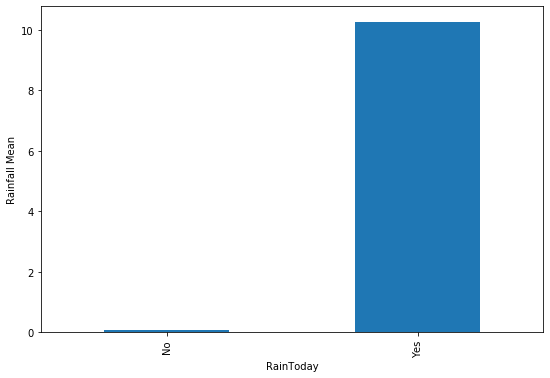

In [17]:
data.groupby('RainToday')['Rainfall'].mean().plot(kind='bar', figsize=(9,6))
plt.ylabel('Rainfall Mean')

kondisi jika hari hujan memiliki nilai rata-rata rainfall jauh lebih tinggi jika dibandingkan kondisi tidak hujan

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

Australia secara garis besar memiliki 4 musim yaitu spring, summer, winter dan autumn. masing masing musim terjadi direntang periode/bulan yang berbeda-beda.
<br> 
* summer terjadi di bulan desember, januari dan februari
* autumn terjadi di bulan maret, april dan mei
* winter terjadi di bulan juni, juli, dan agustus
* spring terjadi di bulan september, oktober dan november
<br>

penulis akan melakukan feature engineereing dengan mengelompokan bulan berdasarkan musim2 nya

In [19]:
data['season'] = data['Month']
months2 = [[12, 1, 2], [3, 4, 5], [6,7,8], [9, 10, 11]]
seaons2 = ['summer', 'autumn', 'winter', 'spring']
for i in range(4):
  data = data.replace({'season': months2[i]}, seaons2[i])

data =  data.drop(columns=['Day', 'Month'])

Text(0, 0.5, 'Rainfall Mean')

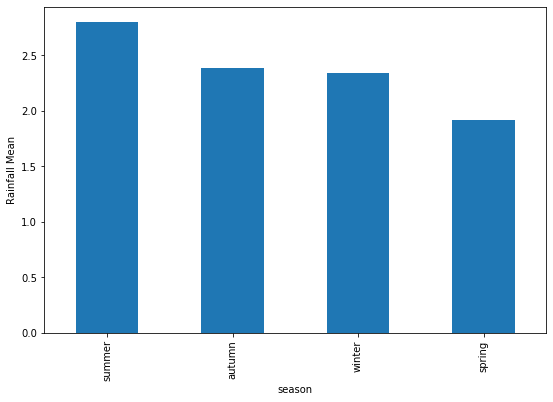

In [20]:
data.groupby(['season'])['Rainfall'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(9,6))
plt.ylabel('Rainfall Mean')

summer memiliki rata2 rainfall paling tinggi dibanding musim2 lainya dan spring memiliki rata2 rainfall paling rendah. hal ini menujukan bahwa pada bulan desember, januari, dan march merupakan bulan paling basah

kolom location memiliki kardinalitas yang tinggi, oleh sebab itu penulis berusaha mereduksi efek tersebut dengan mengelompokan titik lokasi berdasarkan kluster daerah masing-masing.

In [21]:
city = {'City':['Albury','Badgerys Creek','Cobar','Coffs Harbour','Moree Australia','Newcastle Australia','Norah Head','Norfolk Island','Penrith Australia',
                'Richmond Australia','Sydney','Sydney Airport','Wagga Wagga','Williamtown','Wollongong','Canberra','Tuggeranong','Mount Ginini',
                'Ballarat','Bendigo','Sale Australia','Melbourne Airport','Melbourne','Mildura','Nhill Australia','Portland Australia','Watsonia','Dartmoor Australia',
                'Brisbane','Cairns','Gold Coast','Townsville','Adelaide','Mount Gambier','Nuriootpa','Woomera','Albany Australia','Witchcliffe',
                'Pearce RAAF','Perth Airport','Perth','Salmon Gums','Walpole Australia','Hobart','Launceston','Alice Springs','Darwin Australia',
                'Katherine Australia','Uluru Australia']
        } 

df_city = pd.DataFrame(city) 

In [22]:
#fungsi untuk mencari koordinat lokasi
longitude = []
latitude = []
def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="your_app_name")     
        return geolocator.geocode(city)
    except GeocoderTimedOut:     
        return findGeocode(city)    

In [23]:
#loop untuk memasukan koordinat yg didappat kedalam masing2 kolom latitude dan longitude
for i in (df_city["City"]):      
  if findGeocode(i) != None:      
      loc = findGeocode(i)
      latitude.append(loc.latitude)
      longitude.append(loc.longitude)      
  else:
      latitude.append(np.nan)
      longitude.append(np.nan)

In [24]:
df_city["Longitude"] = longitude
df_city["Latitude"] = latitude

In [25]:
fig = px.scatter_geo(df_city, lat='Latitude', lon='Longitude', hover_name="City")
fig.update_layout(title = 'Australia Map', title_x=0.5)
fig.update_layout(
        geo = dict(
            projection_scale=4, #this is kind of like zoom
            center=dict(lat=-23.69839, lon=133.8813), # this will center on the point
        ))
fig.show()

In [26]:
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,season
83255,2015-06-05,Dartmoor,6.7,14.9,25.8,NaN,4.9,WSW,31.0,NaN,WSW,0.0,13.0,NaN,NaN,1021.3,1023.3,NaN,NaN,11.0,14.3,Yes,No,2015,winter
10582,2013-06-02,CoffsHarbour,16.4,20.5,0.0,1.4,NaN,SW,59.0,N,S,20.0,15.0,74.0,57.0,1009.1,1005.3,8.0,3.0,17.5,20.2,No,Yes,2013,winter
34,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,NW,6.0,17.0,41.0,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,No,2009,summer
61770,2010-08-12,Sale,6.5,14.7,6.4,1.2,6.8,SW,56.0,WSW,WSW,31.0,31.0,88.0,55.0,1005.4,1008.4,8.0,7.0,10.0,14.3,Yes,No,2010,winter
144770,2015-08-06,Uluru,3.8,19.7,0.0,NaN,NaN,E,44.0,ESE,E,17.0,20.0,51.0,26.0,1026.3,1022.3,NaN,NaN,9.8,18.5,No,No,2015,winter


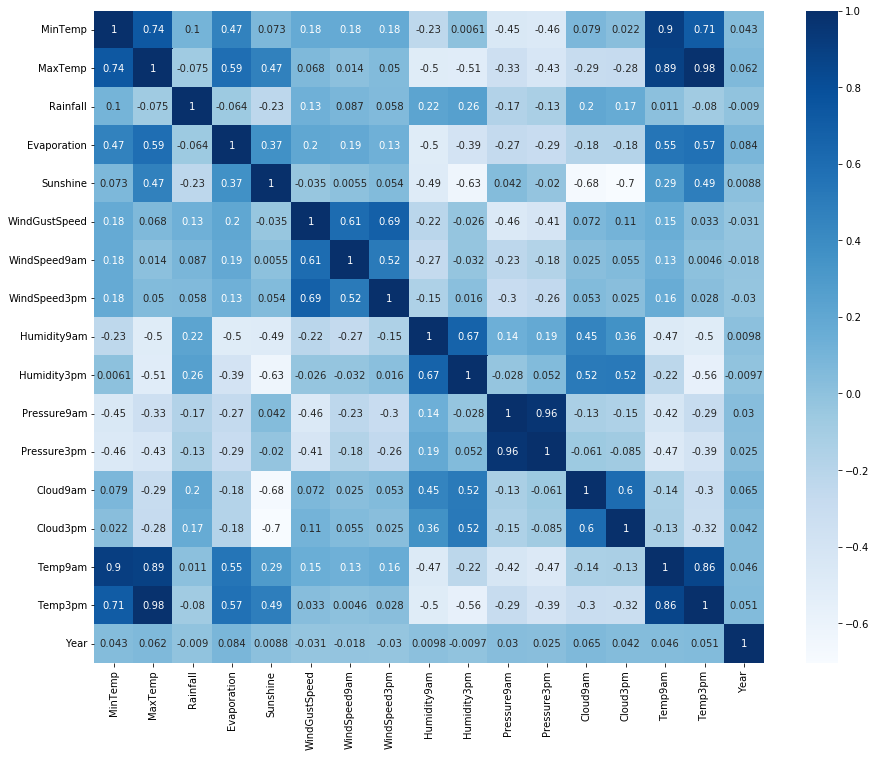

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

insight yang dapat diambil dari heatmap di atas adalah
* korelasi antara MaxTemp dengan Temp3pm sangat tinggi yaitu sebesar 0.98
* korelasi antara MaxTemp dengan Temp9am sangat tinggi yaitu sebesar 0.89
* korelasi antara MinTemp dengan Temp9am sangat tinggi yaitu sebesar 0.9
* korelasi antara MinTemp dengan temp3pm sangat tinggi yaitu sebesar 0.71
* korelasi antara pressure9am dengan pressure3pm sangat tinggi yaitu sebesar 0.96
* korelasi antara temp9am dengan temp3pm sangat tinggi yaitu sebesar 0.86

## 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [28]:
new_data = data.copy()

### a. Data Inference

ambil data inference tanpa nilai NaN

In [29]:
data.shape

(145460, 25)

In [30]:
col = data.columns.to_list()

In [31]:
rs = 20 #random state
samples = 20
data_inf = data[(~data[col[0]].isnull()) & (~data[col[1]].isnull()) & (~data[col[2]].isnull())& (~data[col[3]].isnull()) & (~data[col[4]].isnull()) &
     (~data[col[5]].isnull()) & (~data[col[6]].isnull()) & (~data[col[7]].isnull())& (~data[col[8]].isnull()) & (~data[col[9]].isnull()) &
     (~data[col[10]].isnull()) & (~data[col[11]].isnull()) & (~data[col[12]].isnull())& (~data[col[13]].isnull()) & (~data[col[14]].isnull()) &
     (~data[col[15]].isnull()) & (~data[col[16]].isnull()) & (~data[col[17]].isnull())& (~data[col[18]].isnull()) & (~data[col[19]].isnull()) &
     (~data[col[20]].isnull()) & (~data[col[21]].isnull()) & (~data[col[22]].isnull())& (~data[col[23]].isnull()) & (~data[col[24]].isnull())].sample(samples, random_state=rs)

In [32]:
data_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,season
67743,2009-12-26,Melbourne,12.9,22.1,0.0,6.8,13.0,SSE,46.0,SSE,SSE,22.0,28.0,51.0,49.0,1019.1,1017.7,2.0,0.0,17.1,20.2,No,No,2009,summer
75750,2011-02-10,Portland,14.5,23.6,0.0,3.0,1.0,ENE,24.0,N,E,9.0,11.0,88.0,71.0,1015.3,1012.3,8.0,8.0,18.5,22.8,No,Yes,2011,summer
32275,2014-01-28,Sydney,19.6,26.5,0.0,9.4,13.0,NE,57.0,NNE,NE,17.0,28.0,45.0,56.0,1021.5,1018.4,1.0,1.0,24.7,25.5,No,No,2014,summer
67598,2009-08-03,Melbourne,8.8,15.4,3.2,3.6,7.1,W,93.0,W,NW,20.0,13.0,65.0,35.0,1022.4,1021.9,1.0,6.0,9.9,14.8,Yes,No,2009,winter
117649,2009-01-21,PerthAirport,15.4,27.3,0.0,10.0,13.0,SSW,43.0,SSW,SW,17.0,30.0,63.0,42.0,1016.1,1013.5,1.0,4.0,20.1,26.6,No,No,2009,summer
75986,2011-11-03,Portland,10.5,16.2,3.8,1.6,6.4,W,33.0,SW,W,13.0,24.0,89.0,70.0,1017.9,1018.8,7.0,6.0,12.4,15.1,Yes,No,2011,spring
87682,2010-03-28,Cairns,23.9,28.4,44.4,4.4,1.1,SE,50.0,SSE,ESE,20.0,22.0,85.0,91.0,1012.6,1009.5,8.0,8.0,25.6,25.1,Yes,Yes,2010,autumn
13602,2013-06-13,Moree,13.2,17.2,15.6,4.0,5.4,NNW,30.0,NW,WNW,17.0,17.0,86.0,65.0,1012.8,1010.5,3.0,7.0,14.6,16.4,Yes,No,2013,winter
123740,2017-03-27,Perth,8.3,23.3,0.2,6.2,10.3,SSW,30.0,NE,SW,7.0,17.0,62.0,36.0,1023.8,1019.7,1.0,5.0,16.5,22.5,No,No,2017,autumn
104577,2014-10-15,Nuriootpa,-1.0,17.4,0.0,2.5,12.2,SSW,33.0,N,WSW,4.0,17.0,66.0,35.0,1025.8,1022.1,2.0,2.0,9.2,16.6,No,No,2014,spring


### b. Feature Selection

**drop kolom dengan misval terlalu banyak**

In [33]:
missing = pd.DataFrame(new_data.isnull().sum(),columns = ['Number of missing values'])

missing['% missing_values']= (missing/len(new_data)).round(2)*100
missing

,Number of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


kolom sunshine, evaporation cloud3pm, dan cloud9am memiliki jumah missing value yang terlampau banyak atau kurang lebih 50 persen baris kolom tersebut dari total keseluruhan data adalah missing value. missing value dari kolom tersebut tidak dapat dilacak penyebabnya sehingga sangta tidak mungkin untuk diimputasi ditambah lagi jumlah missinya valuenya hampir 50 persen dari data, maka untuk kolom ini akan dilakukan drop.

In [34]:
new_data = new_data.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)

**drop salah satu dari dua kolom dengan korelasi tinggi**

In [35]:
new_data = new_data.drop(['Temp9am','Temp3pm','Pressure9am'], axis=1)

**Drop kolom waktu date dan year**

In [36]:
new_data = new_data.drop(['Date','Year'], axis=1)

In [37]:
new_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,season
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,No,No,summer
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,No,No,summer
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,No,No,summer
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,No,No,summer
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,No,No,summer


In [38]:
# drop nilai nan dari kolom target
new_data.dropna(how='all', subset=['RainTomorrow'], inplace=True) 

**mengurangi cardinality yang tinggi**

**a. Kardinality reduction untuk kolom location**

In [39]:
def position(df):
  city_list = list(data.Location.unique())
  cit_pos = [['Darwin','Katherine'], ['SalmonGums', 'Albany', 'Walpole', 'Witchcliffe', 'PearceRAAF', 'Perth'], 
            ['Cairns', 'Townsville'], ['Uluru', 'AliceSprings'], ['NorfolkIsland']]
  misc = [e for e in city_list if e not in ('Darwin', 'Katherine','SalmonGums', 'Albany', 'Walpole', 'Witchcliffe', 
                                      'PearceRAAF', 'Perth', 'Cairns', 'Townsville', 'Uluru', 'AliceSprings',
                                      'NorfolkIsland')]
  cit_cat = ['top', 'left', 'right', 'mid', 'out', 'bot']
  cit_pos.append(misc)

  df2 = df
  df2['position'] = df2['Location']
  for i in range(len(cit_cat)):
    df2 = df2.replace({'position': cit_pos[i]}, cit_cat[i])
  return df2

In [40]:
new_data = position(new_data)

In [41]:
new_data = new_data.drop('Location', axis=1)

In [42]:
new_data.sample(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,season,position
15084,15.6,29.4,0.0,NaN,NaN,NE,NW,4.0,19.0,78.0,53.0,NaN,No,No,summer,bot
63487,5.0,15.3,0.2,E,26.0,NW,E,9.0,13.0,92.0,72.0,1023.8,No,No,winter,bot
99063,15.9,23.8,0.0,WSW,33.0,S,WSW,9.0,19.0,69.0,47.0,1021.8,No,No,autumn,bot
3767,13.3,29.4,0.2,ENE,30.0,N,N,9.0,11.0,72.0,53.0,1014.0,No,No,summer,bot
49264,-2.1,12.8,0.2,W,35.0,NaN,W,0.0,15.0,99.0,53.0,1020.8,No,No,winter,bot


**b. Kardinality reduction untuk arah mata angin**

In [43]:
def direction_change(df):
  dir = [['ENE','E','ESE'], ['SSE','S','SSW'],['WSW','W','WNW'], ['NNW','N','NNE']]
  dir2 = ['E', 'S', 'W', 'N']
  df2 = df
  for i in range(len(dir2)):
    df2 = df2.replace({'WindGustDir': dir[i]}, dir2[i])
    df2 = df2.replace({'WindDir9am': dir[i]}, dir2[i])
    df2 = df2.replace({'WindDir3pm': dir[i]}, dir2[i])
  
  return df2

In [44]:
new_data = direction_change(new_data)

In [45]:
new_data.sample(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,season,position
76478,10.1,21.6,1.0,N,50.0,NE,N,13.0,17.0,71.0,39.0,1020.8,No,No,autumn,bot
95133,21.9,29.8,22.8,N,31.0,E,E,11.0,20.0,93.0,81.0,1009.9,Yes,Yes,autumn,right
32158,15.2,18.9,0.0,W,65.0,W,S,30.0,24.0,41.0,41.0,1014.3,No,Yes,spring,bot
86425,9.8,24.9,0.0,W,30.0,W,W,6.0,9.0,52.0,36.0,1012.9,No,No,autumn,bot
11591,20.3,28.7,0.8,NE,31.0,W,E,9.0,20.0,79.0,61.0,1020.5,No,No,autumn,bot


**drop data inference**

In [46]:
new_data = new_data.drop(data_inf.index)

### c. Outliers & misval

In [47]:
def iqr(datas, m):
  q3 = np.percentile(datas, 75)
  q1 = np.percentile(datas, 25)
  bb = q1 - (q3-q1)*m #batas bawah
  ba = q3 + (q3-q1)*m #batas atas
  return bb, ba

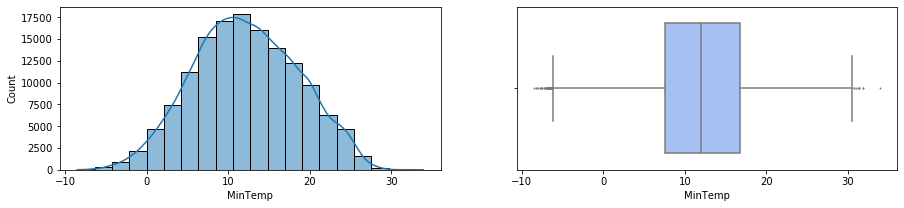

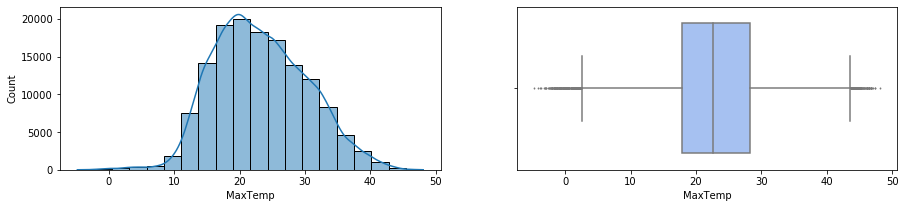

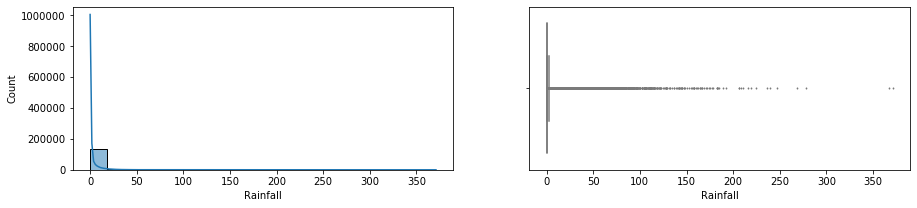

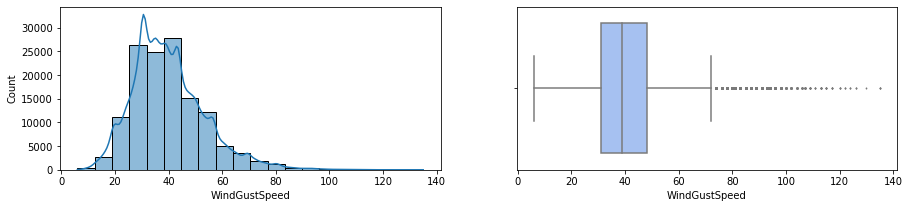

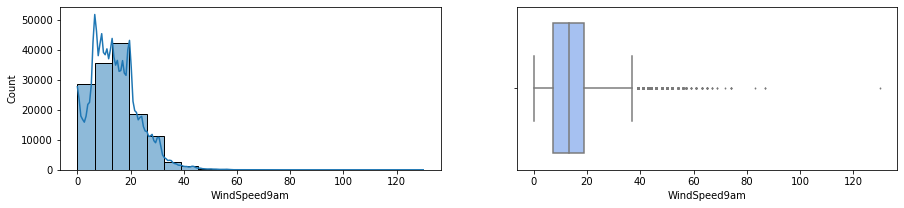

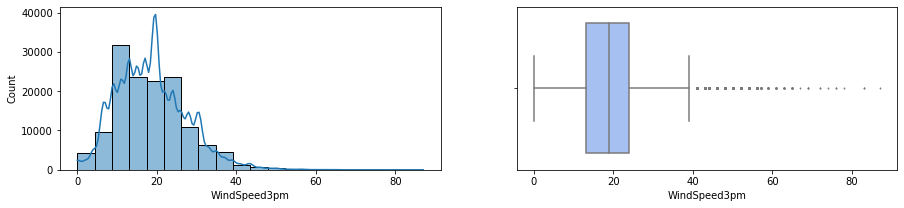

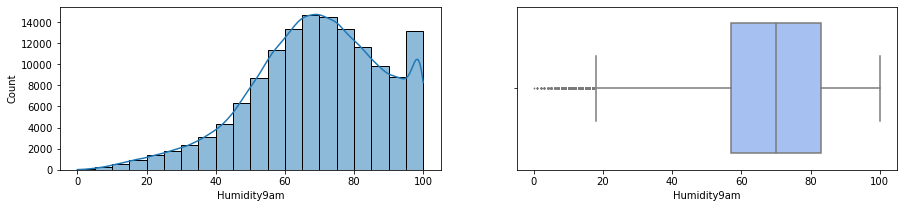

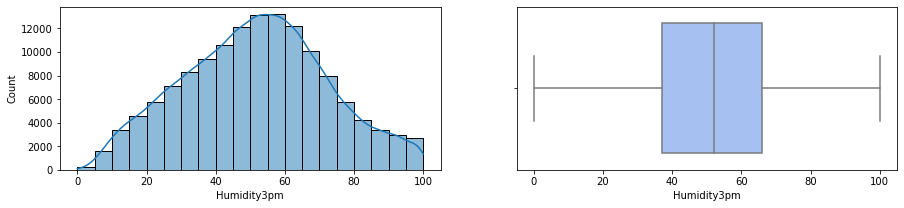

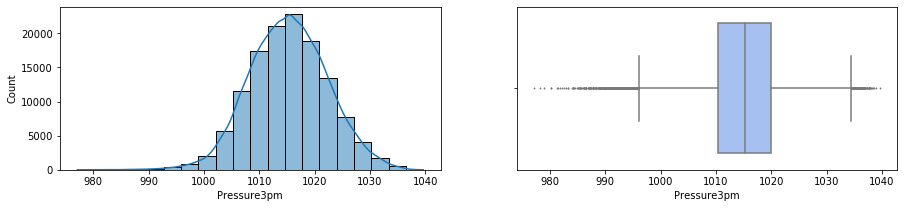

In [48]:
cols = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm']
for i in cols:
  fig, axs = plt.subplots(1,2,figsize=(15, 3))
  sns.histplot(new_data[i],bins=20, kde=True,ax=axs[0]);
  sns.boxplot(new_data[i], ax = axs[1], color='#99befd', fliersize=1);

In [49]:
new_data=new_data.drop(['Rainfall'], axis=1)

In [50]:
#mendefinisikan kolom mana yg numerik dan kolom mana yang kategorikal
num_values = new_data.select_dtypes(include=np.number).columns.to_list()
cat_values = new_data.select_dtypes(object).columns.to_list()

In [51]:
data.shape, new_data.shape

((145460, 25), (142173, 15))

kolom yang semulanya 25 sejauh ini sudah dapat direduksi hingga tersisa 15

**Outlier kolom MinTemp dan MaxTemp**

suhu suhu yang ekstrim seperti terlalu panas atau terlalu dingin pada kasus ini menimbulkan outliers pada data. oleh sebab itu, outliers ini akan dilakukan capping, penulis tidak mengambil resiko melakukan trimming sebab penulis menduga anomali faktor alam seperti ini lumrah terjadi dan termasuk informasi penting. bisa jadi suhu ekstrim mengandung informasi penting terkait apakah hujan atau tidak

In [52]:
# Impute missing
mean_values = new_data[['MinTemp','MaxTemp']].mean()
new_data[['MinTemp','MaxTemp']] = new_data[['MinTemp','MaxTemp']].fillna(value=mean_values)

In [53]:
# Outlier MinTemp
bb, ba =iqr(new_data.MinTemp, 1.5)
bb, ba

#Capping
new_data['MinTemp'] = np.where(new_data['MinTemp']>ba, ba, 
         np.where(new_data['MinTemp']<bb, bb, new_data['MinTemp']))

In [54]:
# Outlier MaxTemp
bb, ba =iqr(new_data.MaxTemp, 1.5)
bb, ba

#Capping
new_data['MaxTemp'] = np.where(new_data['MaxTemp']>ba, ba, 
         np.where(new_data['MaxTemp']<bb, bb, new_data['MaxTemp']))

**Outlier kolom feature wind**

kecepatan angin yang ekstrim pada kasus ini menimbulkan outliers pada data. oleh sebab itu, outliers ini juga akan dilakukan capping

In [55]:
# Impute missing
median_values = new_data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].median()
new_data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']] = new_data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].fillna(value=median_values)

In [56]:
# Outlier WindGustSpeed
bb, ba =iqr(new_data.WindGustSpeed, 1.5)
print(bb, ba)

#Capping
new_data['WindGustSpeed'] = np.where(new_data['WindGustSpeed']>ba, ba, 
         np.where(new_data['WindGustSpeed']<bb, bb, new_data['WindGustSpeed']))

8.5 68.5


In [57]:
# Outlier WindSpeed9am
bb, ba =iqr(new_data.WindSpeed9am, 1.5)
print(bb, ba)

#Capping
new_data['WindSpeed9am'] = np.where(new_data['WindSpeed9am']>ba, ba, 
         np.where(new_data['WindSpeed9am']<bb, bb, new_data['WindSpeed9am']))

-11.0 37.0


In [58]:
# Outlier WindSpeed3pm
bb, ba =iqr(new_data.WindSpeed3pm, 1.5)
print(bb, ba)

#Capping
new_data['WindSpeed3pm'] = np.where(new_data['WindSpeed3pm']>ba, ba, 
         np.where(new_data['WindSpeed3pm']<bb, bb, new_data['WindSpeed3pm']))

-3.5 40.5


**Outlier kolom pressure**

In [59]:
# Impute missing
median_values = new_data['Pressure3pm'].mean()
new_data['Pressure3pm'] = new_data['Pressure3pm'].fillna(value=median_values)

In [60]:
# Outlier Pressure3pm
bb, ba =iqr(new_data.Pressure3pm, 1.5)
print(bb, ba)

#Capping
new_data['Pressure3pm'] = np.where(new_data['Pressure3pm']>ba, ba, 
         np.where(new_data['Pressure3pm']<bb, bb, new_data['Pressure3pm']))

998.4000000000001 1032.0


**Outlier kolom humidity**

In [61]:
# Impute missing
median_values = new_data[['Humidity9am', 'Humidity3pm']].mean()
new_data[['Humidity9am', 'Humidity3pm']] = new_data[['Humidity9am', 'Humidity3pm']].fillna(value=median_values)

In [62]:
# Outlier Humidity9am
bb, ba =iqr(new_data.Humidity9am, 1.5)
print(bb, ba)

#Capping
new_data['Humidity9am'] = np.where(new_data['Humidity9am']>ba, ba, 
         np.where(new_data['Humidity9am']<bb, bb, new_data['Humidity9am']))

18.0 122.0


In [63]:
new_data.isnull().sum()

MinTemp              0
MaxTemp              0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure3pm          0
RainToday         1406
RainTomorrow         0
season               0
position             0
dtype: int64

### d. Data Splitting and transfomation

**Data Splitting**

In [64]:
X=new_data.drop(columns=['RainTomorrow'])
y=new_data['RainTomorrow']

In [65]:
X.sample(5)

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,season,position
65576,7.9,17.4,S,46.0,S,S,24.0,28.0,53.0,47.0,1016.100000,No,spring,bot
122486,9.9,19.6,S,37.0,S,S,11.0,19.0,77.0,54.0,1018.000000,Yes,spring,left
90045,23.0,29.0,S,37.0,S,S,19.0,15.0,82.0,70.0,1011.100000,Yes,summer,right
121267,21.1,32.9,N,68.5,E,E,9.0,4.0,69.0,42.0,1010.200000,No,autumn,left
27079,22.3,23.7,S,35.0,S,S,7.0,24.0,97.0,98.0,1015.258296,No,autumn,bot


In [66]:
y.value_counts()

No     110298
Yes     31875
Name: RainTomorrow, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)

**Data Transformation**

In [68]:
le = LabelEncoder()

In [69]:
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [70]:
num_col = ['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure3pm']
ohe_col = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','season','position']

In [71]:
scaler = StandardScaler()

In [72]:
#scaling nilai numerik
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

In [73]:
imputer = SimpleImputer(strategy='most_frequent')

In [74]:
#imputasi nilai nan pada kolom kategorikal dengan modus
X_train[ohe_col] = imputer.fit_transform(X_train[ohe_col])
X_test[ohe_col] = imputer.transform(X_test[ohe_col])

In [75]:
X_train.isnull().sum()

MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
RainToday        0
season           0
position         0
dtype: int64

In [76]:
ohe = OneHotEncoder()

In [77]:
#scaling data kategorikan dengan one hot encoder
X_train_enc = ohe.fit_transform(X_train[ohe_col]).toarray()
X_test_enc = ohe.transform(X_test[ohe_col]).toarray()

In [78]:
ohe.categories_

[array(['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], dtype=object),
 array(['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], dtype=object),
 array(['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['autumn', 'spring', 'summer', 'winter'], dtype=object),
 array(['bot', 'left', 'mid', 'out', 'right', 'top'], dtype=object)]

In [79]:
#menggabungkan kolom numerik dan kategorikal
X_train_final = np.concatenate([X_train_scaled, X_train_enc], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_enc], axis=1)

## 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [80]:
model = LogisticRegression(fit_intercept=True)

In [81]:
#model2 = SVC(C=2, gamma=1, kernel='rbf') #overfitting
#model2 = SVC(C=1, gamma='scale', kernel='rbf', cache_size=3000)
model2 = SVC()

## 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### a. Model Logistic Regression

In [82]:
model.fit(X_train_final,y_train_enc)

LogisticRegression()

In [83]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

### b. Model SVM

In [84]:
model2.fit(X_train_final,y_train_enc)

SVC()

In [85]:
y_pred_train_svc = model2.predict(X_train_final)
y_pred_test_svc = model2.predict(X_test_final)

## 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### a. Model Logistic Regression

In [86]:
y_train_pred_proba_log = model.predict_proba(X_train_final)[:,1]
y_test_pred_proba_log = model.predict_proba(X_test_final)[:,1]

In [87]:
print('------------TRAIN-------------')
print('F1 Score:', f1_score(y_train_enc,y_pred_train))
print('accuracy Score:', accuracy_score(y_train_enc,y_pred_train))
print('Precision Score:', precision_score(y_train_enc,y_pred_train))
print('Recall Score:', recall_score(y_train_enc,y_pred_train))
print('AUC Score:', roc_auc_score(y_train_enc, y_train_pred_proba_log))
print('')
print('------------TEST-------------')
print('F1 Score:', f1_score(y_test_enc,y_pred_test))
print('accuracy Score:', accuracy_score(y_test_enc,y_pred_test))
print('Precision Score:', precision_score(y_test_enc,y_pred_test))
print('Recall Score:', recall_score(y_test_enc,y_pred_test))
print('AUC Score:', roc_auc_score(y_test_enc, y_test_pred_proba_log))

------------TRAIN-------------
F1 Score: 0.5712135819596963
accuracy Score: 0.8396753943273136
Precision Score: 0.712835260285228
Recall Score: 0.47653797865662273
AUC Score: 0.855002815078006

------------TEST-------------
F1 Score: 0.5703279150615428
accuracy Score: 0.8391770705116933
Precision Score: 0.7131109022556391
Recall Score: 0.47518396743385
AUC Score: 0.8577273608084091


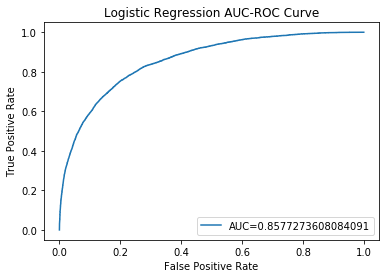

In [88]:
#define metrics
fpr, tpr, _ = roc_curve(y_test_enc,  y_test_pred_proba_log)
auc = roc_auc_score(y_test_enc, y_test_pred_proba_log)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression AUC-ROC Curve')
plt.legend(loc=4)
plt.show()

### b. Model SVM

In [102]:
print('------------TRAIN-------------')
print('Train F1 Score:', f1_score(y_train_enc,y_pred_train_svc))
print('Train accuracy Score:', accuracy_score(y_train_enc,y_pred_train_svc))
print('Precision Score:', precision_score(y_train_enc,y_pred_train_svc))
print('Recall Score:', recall_score(y_train_enc,y_pred_train_svc))
print('')
print('------------TEST-------------')
print('Test F1 Score:', f1_score(y_test_enc,y_pred_test_svc))
print('Test accuracy Score:', accuracy_score(y_test_enc,y_pred_test_svc))
print('Precision Score:', precision_score(y_test_enc,y_pred_test_svc))
print('Recall Score:', recall_score(y_test_enc,y_pred_test_svc))

------------TRAIN-------------
Train F1 Score: 0.6084099546401863
Train accuracy Score: 0.8595807909405827
Precision Score: 0.8110740668104857
Recall Score: 0.486778091650973

------------TEST-------------
Test F1 Score: 0.58878963384706
Test accuracy Score: 0.8526815544223668
Precision Score: 0.7892105263157895
Recall Score: 0.46954751839674336


**SVC dengan hyperparameter (C=1, gamma='scale', kernel='rbf')**

------------TRAIN-------------
<br>
Train F1 Score: 0.6086444874843707
<br>
Train accuracy Score: 0.859651128031089
<br>
<br>
------------TEST-------------
<br>
Test F1 Score: 0.5887318413820181
<br>
Test accuracy Score: 0.852646386495516

**SVC dengan hyperparameter (C=1, gamma='auto', kernel='rbf')**

------------TRAIN-------------
<br>
Train F1 Score: 0.5731930811136495
<br>
Train accuracy Score: 0.8505248905379029
<br>
Precision Score: 0.7958173579644475
<br>
Recall Score: 0.44789704959196486
<br>
AUC Score: 0.7073536239461241
<br>
<br>
------------TEST-------------
<br>
Test F1 Score: 0.5633463737586518
<br>
Test accuracy Score: 0.8469140144188501
<br>
Precision Score: 0.7839195979899497
<br>
Recall Score: 0.43964302489431656
<br>
AUC Score: 0.7022688999653006

**SVC dengan hyperparameter (C=2, gamma=1, kernel='rbf')**

------------TRAIN-------------
<br>
Train F1 Score: 0.9786249800606156
<br>
Train accuracy Score: 0.9905748298721624
<br>
<br>
------------TEST-------------
<br>
Test F1 Score: 0.39799554565701556
<br>
Test accuracy Score: 0.8098821874450501

untuk model svm ini ternyata pengguana nilai gamma='scale' dapat menambah performansi dari model

## 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [90]:
data_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,season
67743,2009-12-26,Melbourne,12.9,22.1,0.0,6.8,13.0,SSE,46.0,SSE,SSE,22.0,28.0,51.0,49.0,1019.1,1017.7,2.0,0.0,17.1,20.2,No,No,2009,summer
75750,2011-02-10,Portland,14.5,23.6,0.0,3.0,1.0,ENE,24.0,N,E,9.0,11.0,88.0,71.0,1015.3,1012.3,8.0,8.0,18.5,22.8,No,Yes,2011,summer
32275,2014-01-28,Sydney,19.6,26.5,0.0,9.4,13.0,NE,57.0,NNE,NE,17.0,28.0,45.0,56.0,1021.5,1018.4,1.0,1.0,24.7,25.5,No,No,2014,summer
67598,2009-08-03,Melbourne,8.8,15.4,3.2,3.6,7.1,W,93.0,W,NW,20.0,13.0,65.0,35.0,1022.4,1021.9,1.0,6.0,9.9,14.8,Yes,No,2009,winter
117649,2009-01-21,PerthAirport,15.4,27.3,0.0,10.0,13.0,SSW,43.0,SSW,SW,17.0,30.0,63.0,42.0,1016.1,1013.5,1.0,4.0,20.1,26.6,No,No,2009,summer
75986,2011-11-03,Portland,10.5,16.2,3.8,1.6,6.4,W,33.0,SW,W,13.0,24.0,89.0,70.0,1017.9,1018.8,7.0,6.0,12.4,15.1,Yes,No,2011,spring
87682,2010-03-28,Cairns,23.9,28.4,44.4,4.4,1.1,SE,50.0,SSE,ESE,20.0,22.0,85.0,91.0,1012.6,1009.5,8.0,8.0,25.6,25.1,Yes,Yes,2010,autumn
13602,2013-06-13,Moree,13.2,17.2,15.6,4.0,5.4,NNW,30.0,NW,WNW,17.0,17.0,86.0,65.0,1012.8,1010.5,3.0,7.0,14.6,16.4,Yes,No,2013,winter
123740,2017-03-27,Perth,8.3,23.3,0.2,6.2,10.3,SSW,30.0,NE,SW,7.0,17.0,62.0,36.0,1023.8,1019.7,1.0,5.0,16.5,22.5,No,No,2017,autumn
104577,2014-10-15,Nuriootpa,-1.0,17.4,0.0,2.5,12.2,SSW,33.0,N,WSW,4.0,17.0,66.0,35.0,1025.8,1022.1,2.0,2.0,9.2,16.6,No,No,2014,spring


In [91]:
#reduksi cardinality kolom location
data_inf2 = position(data_inf)

In [92]:
#reduksi cardinality arah mata angin
data_inf2 = direction_change(data_inf2)

In [93]:
data_inf2 = data_inf2[num_col+ohe_col]
y_inf_real = data_inf['RainTomorrow']
data_inf2.head(20)

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,WindGustDir,WindDir9am,WindDir3pm,RainToday,season,position
67743,12.9,22.1,46.0,22.0,28.0,51.0,49.0,1017.7,S,S,S,No,summer,bot
75750,14.5,23.6,24.0,9.0,11.0,88.0,71.0,1012.3,E,N,E,No,summer,bot
32275,19.6,26.5,57.0,17.0,28.0,45.0,56.0,1018.4,NE,N,NE,No,summer,bot
67598,8.8,15.4,93.0,20.0,13.0,65.0,35.0,1021.9,W,W,NW,Yes,winter,bot
117649,15.4,27.3,43.0,17.0,30.0,63.0,42.0,1013.5,S,S,SW,No,summer,bot
75986,10.5,16.2,33.0,13.0,24.0,89.0,70.0,1018.8,W,SW,W,Yes,spring,bot
87682,23.9,28.4,50.0,20.0,22.0,85.0,91.0,1009.5,SE,S,E,Yes,autumn,right
13602,13.2,17.2,30.0,17.0,17.0,86.0,65.0,1010.5,N,NW,W,Yes,winter,bot
123740,8.3,23.3,30.0,7.0,17.0,62.0,36.0,1019.7,S,NE,SW,No,autumn,left
104577,-1.0,17.4,33.0,4.0,17.0,66.0,35.0,1022.1,S,N,W,No,spring,bot


In [94]:
new_data.shape

(142173, 15)

In [95]:
#scaling data numerik
data_inf_scaled = scaler.transform(data_inf2[num_col])

In [96]:
#encoding data kategorikal  
data_inf_enc = ohe.transform(data_inf2[ohe_col]).toarray()

In [97]:
data_inf_final = np.concatenate([data_inf_scaled, data_inf_enc], axis=1)

### a. Model Logistic Regression

In [98]:
y_pred_inf = model.predict(data_inf_final)

In [99]:
real_pred = pd.DataFrame({'real': list(y_inf_real), 'prediction': list(le.inverse_transform(y_pred_inf))})
real_pred

,real,prediction
0,No,No
1,Yes,No
2,No,No
3,No,Yes
4,No,No
5,No,No
6,Yes,Yes
7,No,No
8,No,No
9,No,No


### b. Model SVM

In [100]:
y_pred_inf_svc = model2.predict(data_inf_final)

In [101]:
real_pred2 = pd.DataFrame({'real': list(y_inf_real), 'prediction': list(le.inverse_transform(y_pred_inf_svc))})
real_pred2

,real,prediction
0,No,No
1,Yes,No
2,No,No
3,No,No
4,No,No
5,No,No
6,Yes,Yes
7,No,No
8,No,No
9,No,No


## 10. Pengambilan Kesimpulan

* secara garis besar jika dilihat menggunakan accuracy score kedua model baik svm maupun logistic regression sudah cukup baik yaitu dengan accuracy score untuk logistic regression adalah kisaran 0.83 sedangkan untuk svm lebih unggul dikisaran 0.85
* kabar buruknya adalah untuk kasus prediksi cuaca (hujan), nilai metric recall sangat penting dalam kasus ini dan kedua model memberikan score yang buruk. recall untuk kedua model berada di rentang angka 0.47. ini berarti akan banyak hari yang seharusnya hujan namun model memprediksi tidak hujan, dan ini akan sangat merugikan bagi sebagian orang.